In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx 
import osmnx as osm
from fn_lib import *
from tqdm import tqdm
plt.rcParams['text.usetex'] = True

In [ ]:
G0 = OpenGraph("test")    
A0 = nx.adjacency_matrix(G0).toarray()
 



# print(f"\n V={nx.number_of_nodes(G0)}\n E={nx.number_of_edges(G0)}")

In [ ]:
def unW_RW(G0, n, tmax):
    A = nx.adjacency_matrix(G0).toarray()
    n0 = np.random.choice(A.shape[0], n)
    x = np.zeros((n, tmax), dtype=int)
    x[:, 0] = n0
    for t in tqdm(range(1, tmax)):

        xt = x[:, t-1]         
        Aw = A[xt]             
        deg = Aw.sum(axis=1)   
        # # optional safety (isolated nodes)
        # deg[deg == 0] = 1
        T = Aw / deg[:, None]
        r = np.random.rand(n)
        Tcdf = np.cumsum(T, axis=1)
        x[:, t] = (Tcdf >= r[:, None]).argmax(axis=1) #ITS updation
    return x

def unWRWplot(G0, n, tmax):
    X = unW_RW(G0, n, tmax)
    N = A0.shape[0]
    n = X.shape[0]

    P = np.zeros((N, tmax), dtype=float)

    rows = X.ravel()                                  # node indices
    cols = np.repeat(np.arange(tmax), n)              # time indices

    np.add.at(P, (rows, cols), 1)
    P /= n

    plt.imshow(P, vmin=0, vmax=1, aspect="auto")
    
    return None

In [4]:
n = 1000; tmax = int(1e5)
X = unW_RW(G0, n, tmax)
X.shape

100%|██████████| 99999/99999 [00:20<00:00, 4950.83it/s]


(1000, 100000)

In [5]:
# np.savez_compressed("./test_network_data/test_rw.npz", arr=X)

In [6]:
N = A0.shape[0]
n = X.shape[0]

P = np.zeros((N, tmax), dtype=float)

rows = X.ravel()                                  # node indices
cols = np.repeat(np.arange(tmax), n)              # time indices

np.add.at(P, (rows, cols), 1)
P /= n


In [7]:
P.shape

(40, 100000)

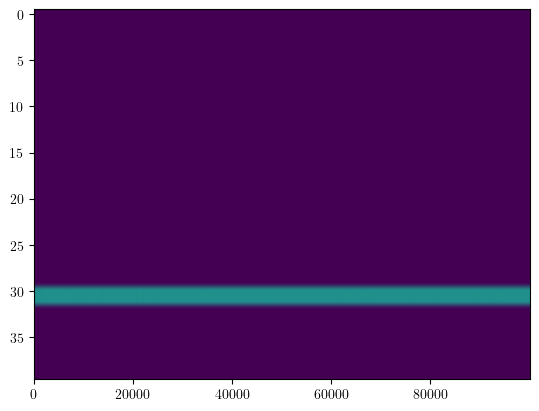

In [8]:
# P_small = P[]  # take every 10th row and column
plt.imshow(P, vmin=0, vmax=1, aspect="auto")


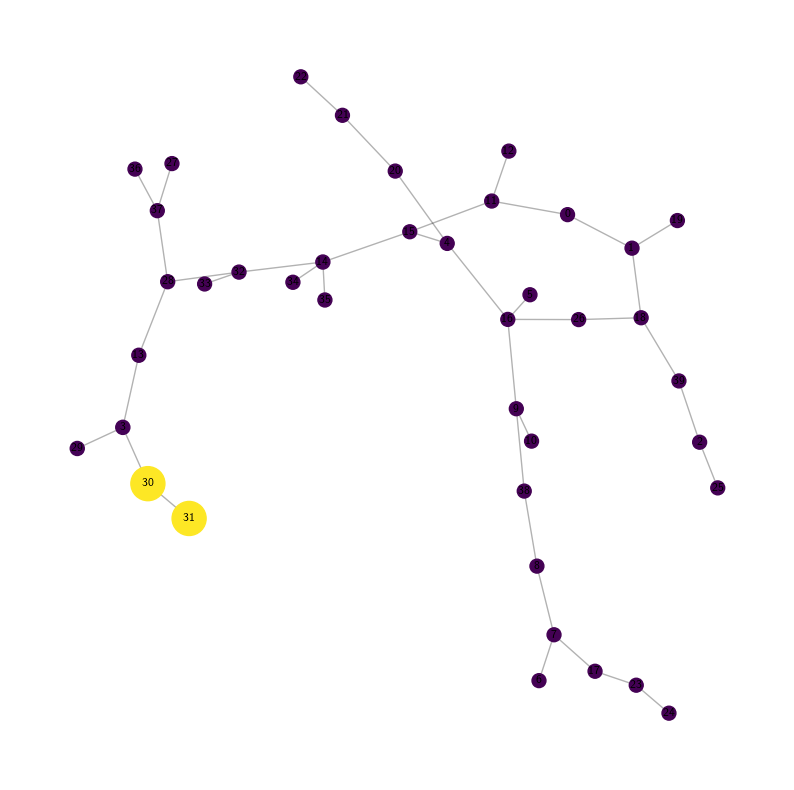

In [9]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Suppose A0 is your adjacency matrix
N = A0.shape[0]
G = nx.from_numpy_array(A0)  # undirected graph

# Node "activity" from P (sum over time or pick a time step)
node_activity = P[:, 0]  # or P.sum(axis=1) to use total over time

# Use a layout that preserves node indices
# For reproducibility, you can use nx.spring_layout with a fixed seed
pos = nx.spring_layout(G, seed=42)

plt.figure(figsize=(10,10))

# Draw nodes sized by activity
nx.draw_networkx_nodes(
    G, pos,
    node_size=100 + 500*node_activity / node_activity.max(),  # scale sizes
    node_color=node_activity,  # optional: color by activity
    cmap=plt.cm.viridis
)

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.3)

# Draw labels (node indices)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.axis('off')
plt.show()


# RW on ER Graph

100%|██████████| 99999/99999 [00:02<00:00, 48382.16it/s]


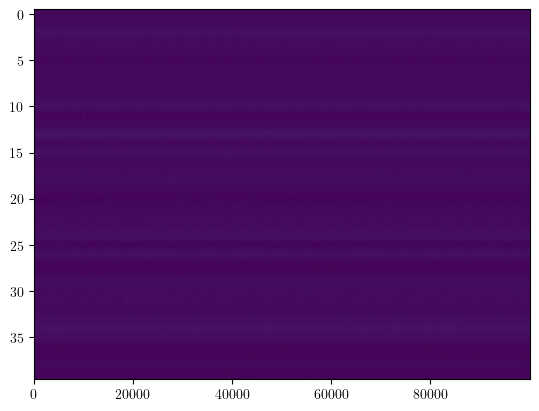

In [22]:
ERG = nx.erdos_renyi_graph(N, p=0.093)

unWRWplot(ERG, n, tmax)


In [ ]:
WSN = nx.watts_strogatz_graph(42, 4, 0.1)

100%|██████████| 99999/99999 [00:02<00:00, 45396.31it/s]


IndexError: index 41 is out of bounds for axis 0 with size 40